In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:

file_path = 'dataset/labeled.csv'
df = pd.read_csv(file_path)

print(df.columns) 

Index(['no', 'username', 'review', 'sentiment'], dtype='object')


In [22]:
X = df['review']  
y = df['sentiment'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords

indonesian_stopwords = stopwords.words('indonesian')

vectorizer = TfidfVectorizer(stop_words=indonesian_stopwords, max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to /home/b401/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/b401/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [24]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# 3. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

In [25]:
# Evaluasi setiap model
print('Random Forest - Accuracy:', accuracy_score(y_test, rf_pred))
print('Logistic Regression - Accuracy:', accuracy_score(y_test, lr_pred))
print('Naive Bayes - Accuracy:', accuracy_score(y_test, nb_pred))

# Menampilkan classification report untuk evaluasi lebih lanjut
print('\nRandom Forest - Classification Report:')
print(classification_report(y_test, rf_pred))

print('\nLogistic Regression - Classification Report:')
print(classification_report(y_test, lr_pred))

print('\nNaive Bayes - Classification Report:')
print(classification_report(y_test, nb_pred))

Random Forest - Accuracy: 0.7291666666666666
Logistic Regression - Accuracy: 0.7291666666666666
Naive Bayes - Accuracy: 0.7083333333333334

Random Forest - Classification Report:
              precision    recall  f1-score   support

        baik       0.71      0.92      0.80        26
       buruk       0.85      0.79      0.81        14
      netral       0.00      0.00      0.00         8

    accuracy                           0.73        48
   macro avg       0.52      0.57      0.54        48
weighted avg       0.63      0.73      0.67        48


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        baik       0.69      0.92      0.79        26
       buruk       0.92      0.79      0.85        14
      netral       0.00      0.00      0.00         8

    accuracy                           0.73        48
   macro avg       0.53      0.57      0.54        48
weighted avg       0.64      0.73      0.67        48


Naive Bayes 

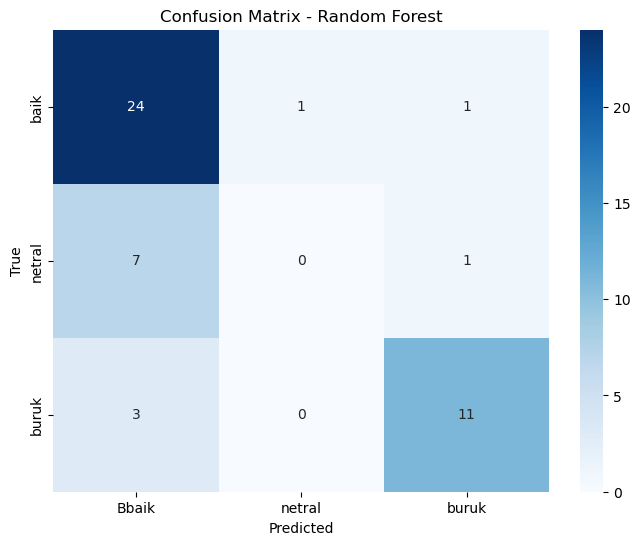

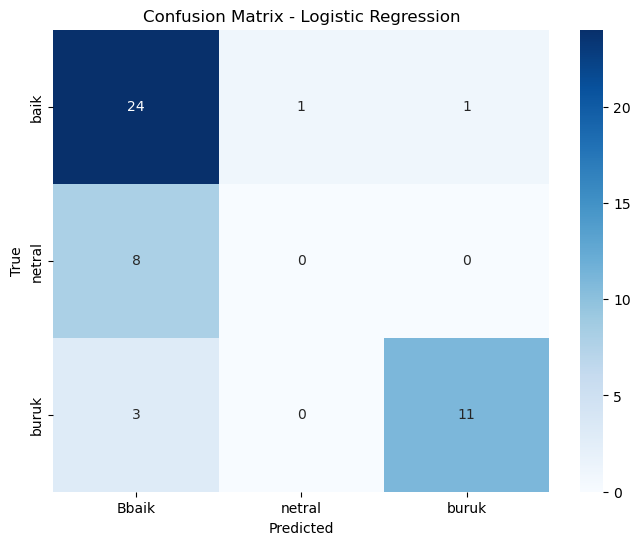

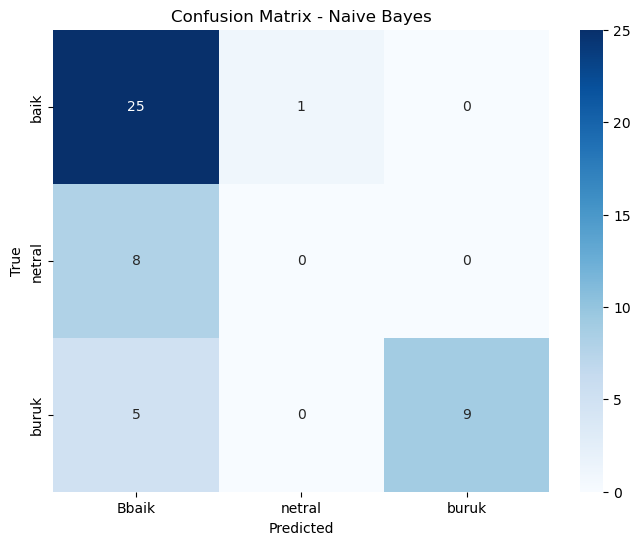

In [27]:
# Menampilkan Confusion Matrix untuk setiap model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bbaik', 'netral', 'buruk'], yticklabels=['baik', 'netral', 'buruk'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels=['baik', 'netral', 'buruk'])
plot_confusion_matrix(rf_cm, 'Random Forest')

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred, labels=['baik', 'netral', 'buruk'])
plot_confusion_matrix(lr_cm, 'Logistic Regression')

# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred, labels=['baik', 'netral', 'buruk'])
plot_confusion_matrix(nb_cm, 'Naive Bayes')